<a href="https://colab.research.google.com/github/joeplustenhouwer/academic-kickstart/blob/master/workshop_week_8_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import matplotlib.pyplot as plt
import numpy as np


In [11]:
kappa=0.3
beta=0.99
std_u=0.01
rho_u=0.8


In [12]:
  #Consider the simple model with a cost-push shock from the lecture

  M=np.array([[1,0,0],
              [-kappa,1,-1],
              [0,0,1]])

  N=np.array([[0,0,0],
              [0,beta,0],
              [0,0,0]])

  P=np.array([[1,0,0],
              [0,0,0],
              [0,0,rho_u]])


F=np.ones((3,3)) #we can initilaize the matrix F with any values
Fnew=np.dot(np.linalg.inv(M-np.dot(N,F)),P) #!!!!! Fill in the question marks in order to implement the linear time iteration formula

while np.max(np.abs(F-Fnew))>0.000001: #here we check whetehr there are any differences left between the elements of the the updated Fnew and the old F. If so, we continue iterating
    F=Fnew #set F equalk to the new F that we just calcualted, so that we can iteratre once more
    Fnew=np.dot(np.linalg.inv(M-np.dot(N,F)),P) #!!!!! Fill in the question marks in order to implement the linear time iteration formula


Q= np.linalg.inv(M-np.dot(N,F))   #!!! calculate Q based on the appropriate formula from the lecture slides

print('F matrix:')
print(F)
print('Q matrix (that also includes columns that relate to shock that do not appear in the model):')
print( Q)
print('Q column that relates to the cost push shock innovation:', Q[:,2])








F matrix:
[[ 1.          0.          0.        ]
 [30.00009963  0.          3.84615385]
 [ 0.          0.          0.8       ]]
Q matrix (that also includes columns that relate to shock that do not appear in the model):
[[ 1.         -0.         -0.        ]
 [30.00009863  1.          4.80769231]
 [ 0.          0.          1.        ]]
Q column that relates to the cost push shock innovation: [-0.          4.80769231  1.        ]


In [13]:
T=1000 #simualte T periods
Z=np.zeros((T,3))
Y=np.zeros(T)
Pi=np.zeros(T)
u=np.zeros(T)
epsilon_u=np.zeros(T)
v=np.zeros((T,3))



In [14]:
Z[0,:]=[0.2,0,0]
Y[0]=Z[0,0]
for t in range(1,T):

  epsilon_u[t]=np.random.randn()
  v[t,:]=np.array([0,0,epsilon_u[t]])
  Z[t,:]=np.dot(F,Z[t-1,:])+np.dot(Q,v[t,:])    #!!!! use F, Q, Z[t-1,:], and v[t,:], to calcualte Z according to the formulae from the lecture slides

  Y[t]=Z[t,0]
  Pi[t]=Z[t,1]
  u[t]=Z[t,2]

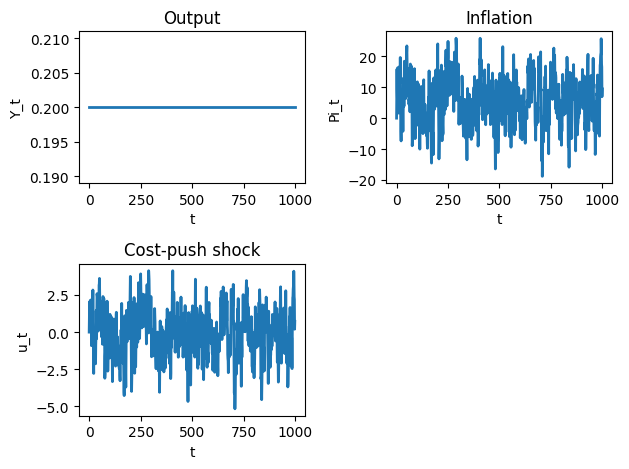

In [15]:
plt.figure()
plt.subplot(2, 2, 1)
plt.plot(Y,linewidth=2)
plt.title('Output')
plt.ylabel('Y_t')
plt.xlabel('t')



plt.subplot(2, 2, 2)
plt.plot(Pi,linewidth=2)
plt.title('Inflation')
plt.ylabel('Pi_t')
plt.xlabel('t')


plt.subplot(2, 2, 3)
plt.plot(u,linewidth=2)
plt.title('Cost-push shock')
plt.ylabel('u_t')
plt.xlabel('t')

plt.tight_layout() #



